In [1]:
import numpy as np
from matplotlib import pyplot as pp
import ipywidgets

%matplotlib inline

In [2]:
pp.rc('font', family = 'serif', size = 16)

In [3]:
def rho_red_light(x, rho_max):
    rho = np.full_like(x,rho_max)
#    rho = rho_max * np.ones_like(x)
    mask = np.where(x < 3.0)
    rho[mask] /= 2
#    rho[mask] = rho_max / 2
    return rho

In [4]:
# Set parameters
nx = 81
L = 4.0
dx = L / (nx - 1)
x = np.linspace(0.0, L, num=nx)

rho_max = 10.0
u_max = 1.0

rho0 = rho_red_light(x,rho_max)

In [21]:
def plot(n, x, rho_hist):
    pp.figure()
    pp.grid()
    pp.title('Time step:{}'.format(n))
    pp.xlabel('Road[km]')
    pp.ylabel('Traffic density[cars/hr]')
    pp.plot(x, rho_hist[n])
    pp.xlim(x[0],x[-1])
    pp.ylim(4.0, 70.0)
    pp.show()

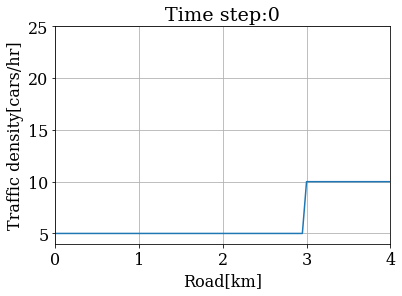

In [6]:
plot(0, x, [rho0])

In [7]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1 - rho / rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [8]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0,max=nt,step=1,
                                     descripion='Time step')
    w = ipywidgets.interactive(plot,n=nt_slider,
                               x=ipywidgets.fixed(x), 
                               rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [9]:
interactive_plot(x, [rho0])

interactive(children=(IntSlider(value=0, description='n', max=0), Output()), _dom_classes=('widget-interact',)…

In [10]:
def lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho,u_max, rho_max)
        rho[1:-1] = 1 / 2 * (rho[2:] + rho[:-2])- dt / (2 * dx) * (F[2:] - F[:-2])
        rho_hist.append(rho.copy())
    return rho_hist

In [11]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [12]:
sigma = 0.5
dt = sigma * dx / u_max
nt = 80
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

In [13]:
def traffic_jacobian(rho, u_max, rho_max):
    J = u_max * (1 - 2 * rho / rho_max)
    return J

def lax_wendroff(rho0,nt, dt, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho,u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - dt / (2 * dx) * (F[2:] - F[:-2]) + dt**2 / (4*dx**2) * ((J[2:]+J[1:-1]) * (F[2:]-F[1:-1]) - (J[1:-1]+J[:-2]) * (F[1:-1]-F[:-2])))
        rho_hist.append(rho.copy())
    return rho_hist

In [14]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_wendroff(rho0, nt, dt, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [15]:
sigma = 0.5
dt = sigma * dx / u_max
nt = 80
rho_hist = lax_wendroff(rho0, nt, dt, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

In [16]:
def maccormack(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        F = traffic_flux(rho,u_max, rho_max)
        rho_star[1:-1] = rho[1:-1] - dt / dx * (F[2:] - F[1:-1])
        F = traffic_flux(rho_star,u_max, rho_max)
        rho[1:-1] = (rho[1:-1] + rho_star[1:-1] - dt / dx * (F[1:-1] - F[:-2])) / 2
        rho_hist.append(rho.copy())
    return rho_hist

In [17]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = maccormack(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [18]:
sigma = 0.5
dt = sigma * dx / u_max
nt = 80
rho_hist = maccormack(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

## Let's try Lax-Friedrichs, Lax-Wendroff and MacCormack in the case of assignment 2

In [19]:
V_max = 90 # km/h
L = 25 # km
rho_max = 100 #cars/km
nx = 101
dt = 0.001 # h

dx = L / (nx - 1)

x = np.linspace(0.0, L, num=nx)

rho0 = np.ones(nx) * 10
mask = np.where((x >= 2.0) & (x <= 4.2))
rho0[mask] = 50.0

In [22]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [23]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_wendroff(rho0, nt, dt, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [25]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = maccormack(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=80), Output()), _dom_classes=('widget-interact',…

## See what happens if we decrease $\rho_{\rm in}$

In [26]:
V_max = 90 # km/h
L = 25 # km
rho_max = 100 #cars/km
nx = 101
dt = 0.001 # h

dx = L / (nx - 1)

x = np.linspace(0.0, L, num=nx)

rho0 = np.ones(nx) * 10
mask = np.where((x >= 2.0) & (x <= 4.2))
rho0[mask] = 30.0

In [27]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [28]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = lax_wendroff(rho0, nt, dt, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…

In [29]:
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_hist = maccormack(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='n', max=40), Output()), _dom_classes=('widget-interact',…